In [1]:
print("DATOS: ")

DATOS: 


##### Instituto Politécnico Nacional
##### Escuela Superior de Cómputo
##### De Luna Ocampo Yanina
##### Uriel

In [2]:
print("-----------------------------------")

-----------------------------------


# Proyecto Final

## Información completa del dataset

1st January 2013 to 24th April 2017 in the city of India

In [3]:
print("Análisis del conjunto de datos de Daily Climate")

print("\nInformación básica: ")
print("\tRepositorio obtenido de: Kaggle")
print("\tLink del conjunto de datos: https://www.kaggle.com/datasets/sumanthvrao/daily-climate-data")
print("\tAutores: sumanthvrao")

Análisis del conjunto de datos de Daily Climate

Información básica: 
	Repositorio obtenido de: Kaggle
	Link del conjunto de datos: https://www.kaggle.com/datasets/sumanthvrao/daily-climate-data
	Autores: sumanthvrao


In [4]:
print("Información relevante: ")
print("1. Los datos de este dataset fueron recolectados por Weather Undergroud API.")


Información relevante: 
1. Los datos de este dataset fueron recolectados por Weather Undergroud API.


In [5]:
print("Descripción de las varibables: ")
print("\tdate -> fecha")
print("\tmeantemp -> temperatura promedio")
print("\thumidity -> humedad")
print("\twine_speed -> velocidad del viento")
print("\tmeanpreasure -> presión del tiempo promedio")

Descripción de las varibables: 
	date -> fecha
	meantemp -> temperatura promedio
	humidity -> humedad
	wine_speed -> velocidad del viento
	meanpreasure -> presión del tiempo promedio


## Desarrollo

In [7]:
!pip install prophet statsmodels

In [8]:
!pip install prophet

In [9]:
!pip install pmdarima

In [10]:
# importing basic libraries and packages 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

import pmdarima as pm
from pmdarima import model_selection
import seaborn as sns

from statsmodels.tsa.stattools import acf, pacf, adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose

from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error, mean_absolute_error

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pmdarima.arima import auto_arima
import math

from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse, aic

import matplotlib as mpl
import matplotlib.pyplot as plt
import missingno as msno
import plotly
import plotly.graph_objs as go
import plotly.express as px
from plotly.subplots import make_subplots
from plotly.offline import iplot, init_notebook_mode
import statsmodels.formula.api as smf
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import scipy.stats as scs
from scipy.optimize import minimize
from statsmodels.tsa.statespace.sarimax import SARIMAX
import itertools
import datetime as dt

## Loading Data

In [11]:
# loading data train
trainData = pd.read_csv("C:/Users/Usuario/Desktop/finalProject/archive/DailyDelhiClimateTrain.csv")

# see if the data was fully loaded
trainData.head()

date   meantemp   humidity  wind_speed  meanpressure
0  2013-01-01  10.000000  84.500000    0.000000   1015.666667
1  2013-01-02   7.400000  92.000000    2.980000   1017.800000
2  2013-01-03   7.166667  87.000000    4.633333   1018.666667
3  2013-01-04   8.666667  71.333333    1.233333   1017.166667
4  2013-01-05   6.000000  86.833333    3.700000   1016.500000

In [12]:
# loading data test
testData = pd.read_csv("C:/Users/Usuario/Desktop/finalProject/archive/DailyDelhiClimateTest.csv")

# see if the data was fully loaded
testData.head()

date   meantemp   humidity  wind_speed  meanpressure
0  2017-01-01  15.913043  85.869565    2.743478     59.000000
1  2017-01-02  18.500000  77.222222    2.894444   1018.277778
2  2017-01-03  17.111111  81.888889    4.016667   1018.333333
3  2017-01-04  18.700000  70.050000    4.545000   1015.700000
4  2017-01-05  18.388889  74.944444    3.300000   1014.333333

## Statistical description

In [13]:
trainData.describe().style.background_gradient(cmap = 'Oranges')

In [14]:
# General information about the data
trainData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1462 entries, 0 to 1461
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          1462 non-null   object 
 1   meantemp      1462 non-null   float64
 2   humidity      1462 non-null   float64
 3   wind_speed    1462 non-null   float64
 4   meanpressure  1462 non-null   float64
dtypes: float64(4), object(1)
memory usage: 57.2+ KB


In [15]:
trainData.columns

Index(['date', 'meantemp', 'humidity', 'wind_speed', 'meanpressure'], dtype='object')

## Data Preprocessing

In [16]:
trainData['date'] = pd.to_datetime(trainData['date'])

# Adding new columns fo month and year
trainData['Day_of_Week'] = trainData['date'].dt.dayofweek
trainData['year'] = trainData['date'].dt.year
trainData['month'] = trainData['date'].dt.month
trainData['day']=trainData['date'].dt.day
trainData['month_of_year'] = trainData['date'].dt.to_period('M')

trainData = trainData[['date', 'Day_of_Week', 'year', 'month', 'day', 'month_of_year', 'meantemp', 'humidity', 'wind_speed', 'meanpressure']]

In [17]:
# Checkimg the output of the preprocessing
trainData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1462 entries, 0 to 1461
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           1462 non-null   datetime64[ns]
 1   Day_of_Week    1462 non-null   int64         
 2   year           1462 non-null   int64         
 3   month          1462 non-null   int64         
 4   day            1462 non-null   int64         
 5   month_of_year  1462 non-null   period[M]     
 6   meantemp       1462 non-null   float64       
 7   humidity       1462 non-null   float64       
 8   wind_speed     1462 non-null   float64       
 9   meanpressure   1462 non-null   float64       
dtypes: datetime64[ns](1), float64(4), int64(4), period[M](1)
memory usage: 114.3 KB


In [18]:
trainData

date  Day_of_Week  year  month  day month_of_year   meantemp  \
0    2013-01-01            1  2013      1    1       2013-01  10.000000   
1    2013-01-02            2  2013      1    2       2013-01   7.400000   
2    2013-01-03            3  2013      1    3       2013-01   7.166667   
3    2013-01-04            4  2013      1    4       2013-01   8.666667   
4    2013-01-05            5  2013      1    5       2013-01   6.000000   
...         ...          ...   ...    ...  ...           ...        ...   
1457 2016-12-28            2  2016     12   28       2016-12  17.217391   
1458 2016-12-29            3  2016     12   29       2016-12  15.238095   
1459 2016-12-30            4  2016     12   30       2016-12  14.095238   
1460 2016-12-31            5  2016     12   31       2016-12  15.052632   
1461 2017-01-01            6  2017      1    1       2017-01  10.000000   

        humidity  wind_speed  meanpressure  
0      84.500000    0.000000   1015.666667  
1      92.000000    2.980000   1017.800000  
2      87.000000    4.633333   1018.666667  
3      71.333333    1.233333   1017.166667  
4      86.833333    3.700000   1016.500000  
...          ...         ...           ...  
1457   68.043478    3.547826   1015.565217  
1458   87.857143    6.000000   1016.904762  
1459   89.666667    6.266667   1017.904762  
1460   87.000000    7.325000   1016.100000  
1461  100.000000    0.000000   1016.000000  

[1462 rows x 10 columns]

## Exploratory Data Analysis

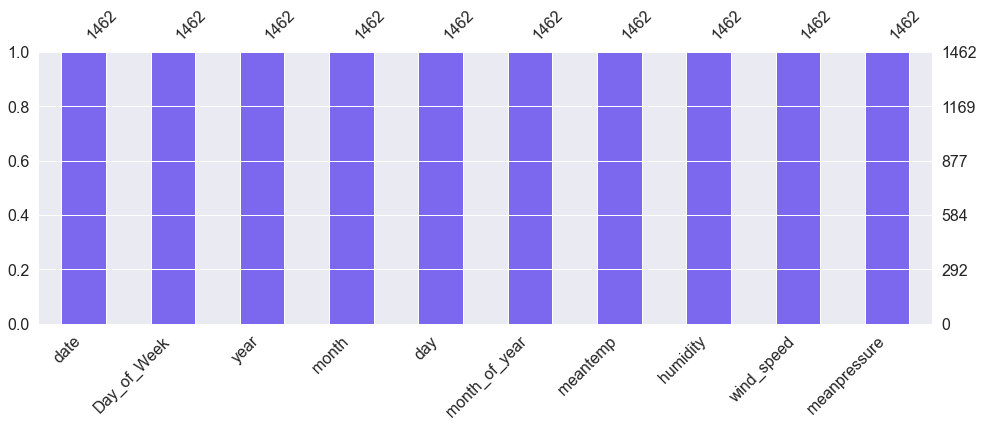

In [19]:
msno.bar(trainData, figsize = (16,5),color = "#7B68EE")
plt.show()

In [20]:
# 1. Exploring the change of Temperature overtime

fig = px.line(trainData, x='date', y='meantemp', title="Temperature change",template='plotly_dark')
fig.show()

El gráfico muestra la estacionalidad de los cambios de temperatura. Esto ayudará a predecir el valor de la temperatura para todo el año.

In [21]:
# 2. Exploring the change of Humidity overtime

fig = px.line(trainData, x='date', y='humidity', title="Humidity change",template='plotly_dark')
fig.show()

También está la estacionalidad.

In [22]:
# 3. Exploring the change of WindSpeed overtime

fig = px.line(trainData, x='date', y='wind_speed', title="Change in wind speed",template='plotly_dark')
fig.show()

Nos encontramos con la trama anterior que la velocidad del viento en los meses (agosto y septiembre) antes de 2015 era alta y algunos cómo valores atípicos. Luego después de 2015 se convirtió en menor.

In [23]:
fig = px.line(trainData, x='date', y='meanpressure', title="Temperature change",template='plotly_dark')

fig.show()

## Seasonal Decomposition

Comprender cuánto de estos cambios de temperatura promedio puede explicarse por una tendencia a largo plazo

In [24]:
ts_decomposition = seasonal_decompose(x=trainData['meantemp'], model='additive', period=6)
trend_estimate = ts_decomposition.trend
seasonal_estimate = ts_decomposition.seasonal
residual_estimate = ts_decomposition.resid

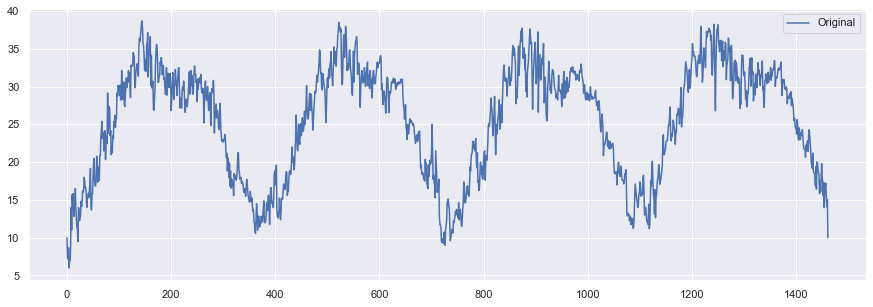

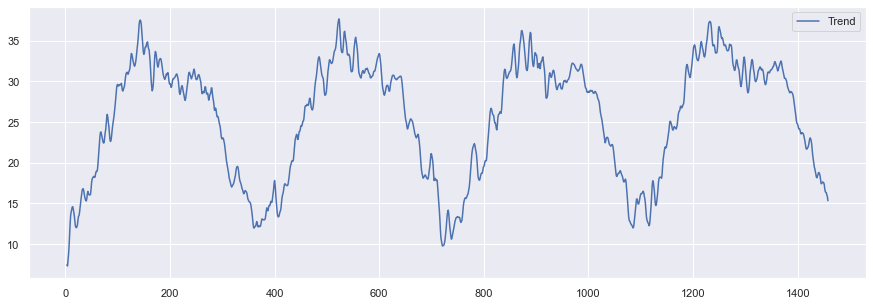

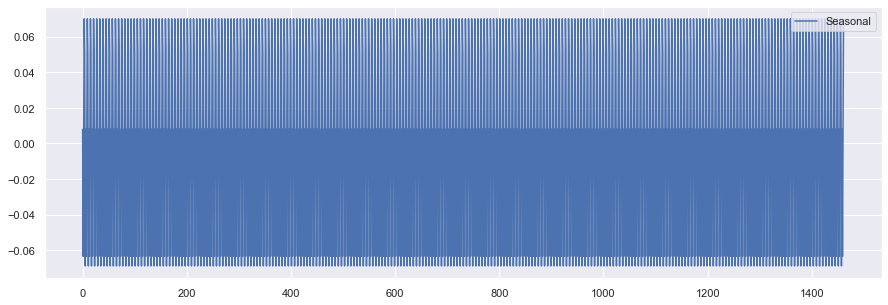

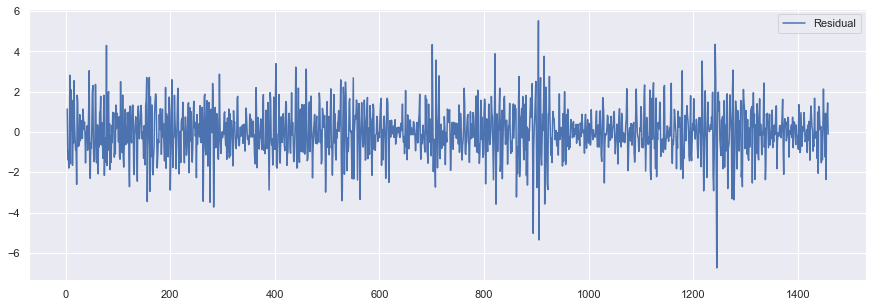

In [25]:
plt.figure(figsize=(15,5))
plt.plot(trainData['meantemp'], label='Original')
plt.legend()

# Componente de tendencia 
plt.figure(figsize=(15,5))
plt.plot(trend_estimate, label='Trend')
plt.legend()

# Componente estacional
plt.figure(figsize=(15,5))
plt.plot(seasonal_estimate, label='Seasonal')
plt.legend()

# Componente residual
plt.figure(figsize=(15,5))
plt.plot(residual_estimate, label='Residual')
plt.legend()

La Figura 1 es la original, la gráfica que ya observamos.

De la Figura 2, conociendo las tendencias a largo plazo del cambio climático, podemos capturar esto en nuestro modelo al incluir una pieza autorregresiva ( AR ).

De la Figura 3, podemos ver que hay una estacionalidad definida en los datos, lo que hace que los datos fluctúen en 0.7 en el transcurso de un año.
Esto tiene sentido intuitivamente, ya que la temperatura del clima cambia dependiendo del mes en el que estemos. Debido a esto, nos gustaría incluir una pieza estacional ( S ) en nuestro modelo.

De la Figura 4, vemos que hay muchos residuos en los datos.

## Analyze our features.

In [26]:
numeric_features=['meantemp', 'humidity', 'wind_speed', 'meanpressure']

In [30]:
fig = make_subplots(rows=len(numeric_features), cols=3)
i=1
for feature in numeric_features:
  fig.add_trace(go.Histogram(x=trainData[feature], name=feature), row=i, col=1)
  fig.add_trace(go.Box(x=trainData[feature], name=feature), row=i, col=2)
  fig.add_trace(go.Violin(x=trainData[feature], name=feature), row=i, col=3)
  i+=1
fig.update_layout(height=2400, width=1800, title_text='<b>Continuos distributions', title_x=0.5)
fig.show()

El objetivo es la temperatura promedio. 
Histograma de la distribución de las diferencias de unidad para esta característica.

Calcula y almacena las diferencias entre los valores de los datos de una serie de tiempo. Las diferencias se utilizan para simplificar la estructura de correlaciones y para ver cualquier patrón.

In [33]:
tempdiff=trainData['meantemp'].diff(periods=1).dropna()

In [34]:
fig = go.Figure(data=[go.Histogram(x=tempdiff,histnorm='probability density')])
fig.update_layout(
    title="Histogram of unit differences of mean temperature",
    title_x = 0.5,
    xaxis_title="Unit difference",
    yaxis_title="Probability Density",
    legend=dict(x=.5, xanchor="center", orientation="h"),
    margin=dict(l=0, r=0, t=30, b=0))
fig.show()

Una serie de diferencias unitarias es estacionaria y es posible seguir trabajando con ella.

No es posible predecir el valor de temperatura a partir del valor de humedad del día anterior.

Analicemos por fechas.

<AxesSubplot:xlabel='month', ylabel='meantemp'>

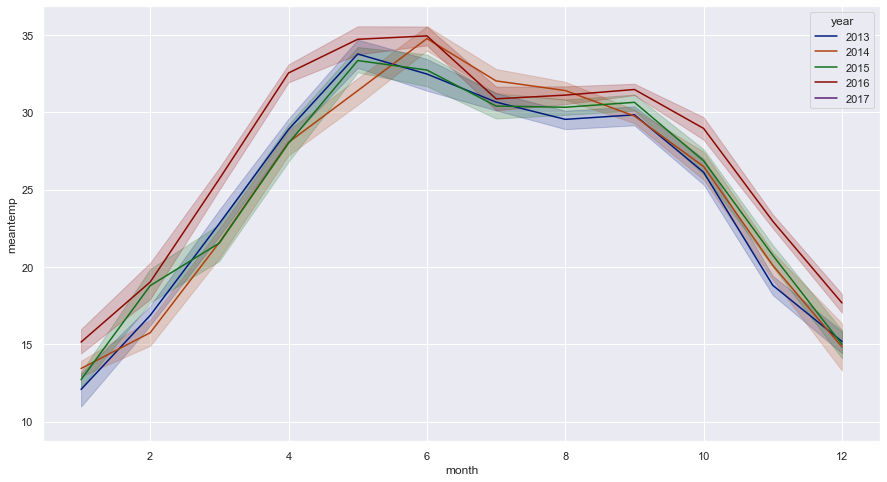

In [39]:
plt.figure(figsize=(15,8))
sns.lineplot(data=trainData,x='month',y='meantemp',hue='year',palette='dark')

<AxesSubplot:xlabel='year', ylabel='meantemp'>

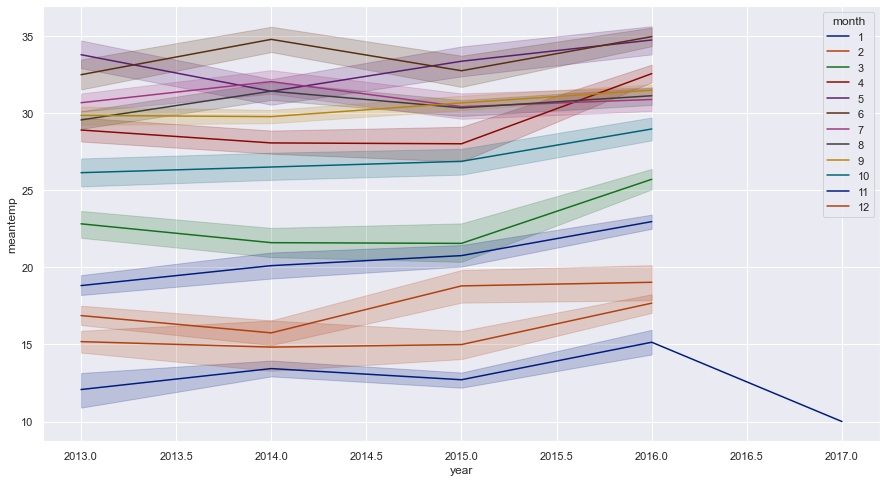

In [41]:
plt.figure(figsize=(15,8))
sns.lineplot(data=trainData,x='year',y='meantemp',hue='month',palette='dark')

Como podemos ver, la temperatura promedio aumenta de año en año. Esto se debe principalmente al cambio climático global.

## ADF, raíz unitaria para la estacionariedad, Dickey-Fuller

Verifiquemos la estacionariedad de nuestra característica de destino.

C:\Users\Usuario\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning:

The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.



Dickey-Fuller criterion: p=0.277412


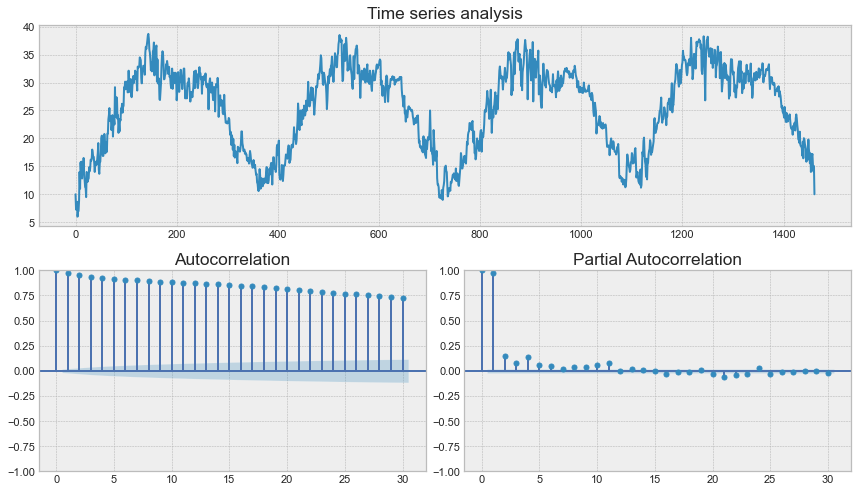

In [47]:
def tsplot(y, lags=None, figsize=(12, 7), style='bmh'):
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
    with plt.style.context(style):    
        fig = plt.figure(figsize=figsize)
        layout = (2, 2)
        ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
        acf_ax = plt.subplot2grid(layout, (1, 0))
        pacf_ax = plt.subplot2grid(layout, (1, 1))

        y.plot(ax=ts_ax)
        ts_ax.set_title('Time series analysis')
        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax, alpha=0.5)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax, alpha=0.5)

        print("Dickey-Fuller criterion: p=%f" % sm.tsa.stattools.adfuller(y)[1])

        plt.tight_layout()
    return 

tsplot(trainData.meantemp, lags=30)

La serie no es estacionaria

Vamos a comprobar una serie de diferencias de unidad para estacionalidad.

C:\Users\Usuario\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning:

The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.



Dickey-Fuller criterion: p=0.000000


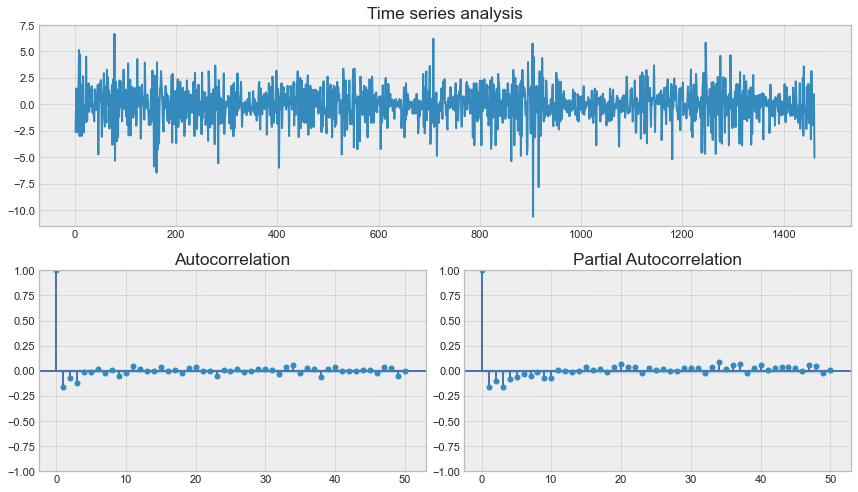

In [54]:
tsplot(tempdiff, lags=50)

## Forecasting - Predicción

Pronosticaremos la serie inicial usando el modelo ARIMA para un período de 30 días. Con un error MAPE> 5 por ciento.

### ARIMA - Autorregresivo integrada media móvil
Predecir futuras tendencias, una forma de análisis de regresión que mide la fuerza de una variable dependiente en relación a otra variable cambiante.
Utiliza valores pasados de la serie.

In [48]:
import pmdarima as pm
from sklearn.metrics import mean_absolute_percentage_error as mapeee
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error

In [49]:
train = pd.read_csv('C:/Users/Usuario/Desktop/finalProject/archive/DailyDelhiClimateTrain.csv')

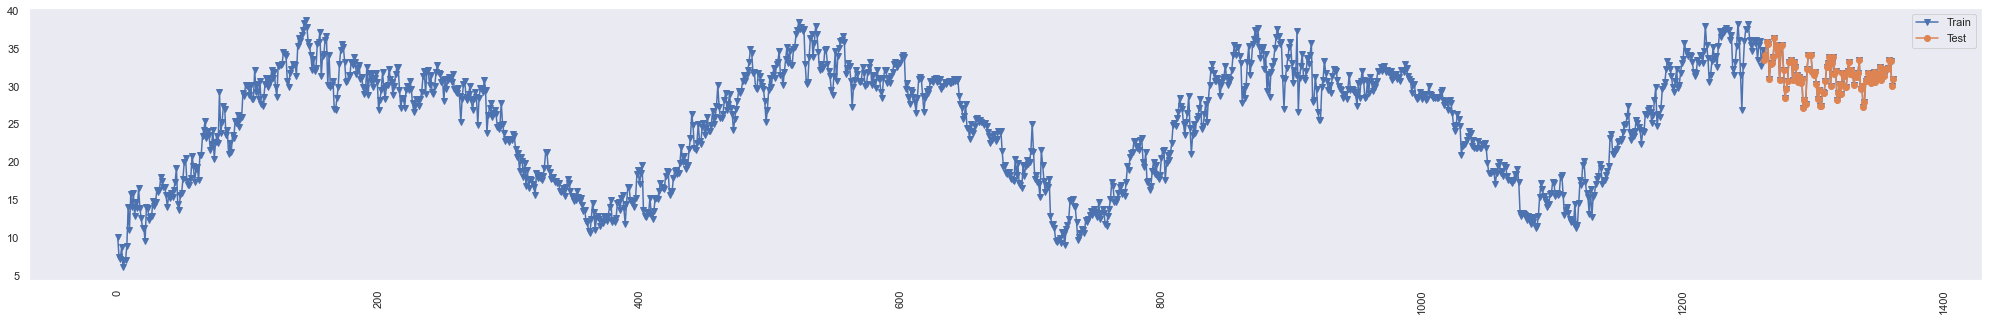

In [50]:
train=train[:-100]
test=train[-100:]

plt.figure(figsize=(35,5))
plt.grid()
plt.plot(train['meantemp'], marker='v', label='Train')
plt.plot( test['meantemp'], marker='o', label='Test')
plt.xticks(rotation=90)
plt.legend()
plt.show()

In [51]:
import pmdarima as pm

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(1,0,1)[4]             : AIC=inf, Time=10.16 sec
 ARIMA(0,2,0)(0,0,0)[4]             : AIC=5457.135, Time=0.46 sec
 ARIMA(1,2,0)(1,0,0)[4]             : AIC=5182.315, Time=0.57 sec
 ARIMA(0,2,1)(0,0,1)[4]             : AIC=inf, Time=2.62 sec
 ARIMA(1,2,0)(0,0,0)[4]             : AIC=5181.505, Time=0.34 sec
 ARIMA(1,2,0)(0,0,1)[4]             : AIC=5182.246, Time=1.13 sec
 ARIMA(1,2,0)(1,0,1)[4]             : AIC=5184.182, Time=1.11 sec
 ARIMA(2,2,0)(0,0,0)[4]             : AIC=5065.073, Time=0.65 sec
 ARIMA(2,2,0)(1,0,0)[4]             : AIC=5067.061, Time=0.87 sec
 ARIMA(2,2,0)(0,0,1)[4]             : AIC=5067.040, Time=1.12 sec
 ARIMA(2,2,0)(1,0,1)[4]             : AIC=5068.947, Time=2.14 sec
 ARIMA(3,2,0)(0,0,0)[4]             : AIC=4918.194, Time=0.55 sec
 ARIMA(3,2,0)(1,0,0)[4]             : AIC=4777.564, Time=3.45 sec
 ARIMA(3,2,0)(2,0,0)[4]             : AIC=4691.492, Time=3.75 sec
 ARIMA(3,2,0)(2,0,1)[4]             : AIC=

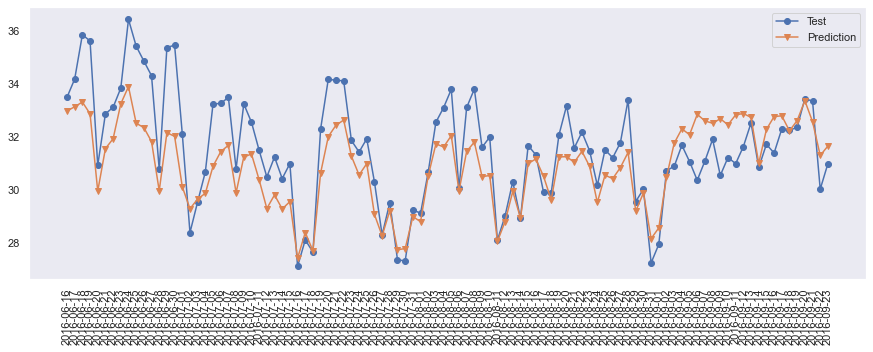

Mean Absolute Percentage Error 0.03275765666642898
Mean Squared Error 1.7645391722395691
RMSE 1.3283595794210126
AIC values 4447.843846110411


In [52]:
# Model Evaluation 

# Fit a simple auto_arima model
arima = pm.auto_arima(train['meantemp'],X=train.drop(columns=['date','meantemp']), d=2,error_action='ignore', trace=True,
                      suppress_warnings=True, maxiter=500,m=4,stationary=False,test='adf')

# Print out summary information on the fit
print(arima.summary())
print(arima.params)

pred=arima.predict(n_periods=100, X=test.drop(columns=['date','meantemp']), alpha=0.05)
pred

plt.figure(figsize=(15,5))
plt.grid()
plt.plot(train['date'][-100:],test['meantemp'], marker='o', label='Test')
plt.plot(train['date'][-100:],pred, marker='v', label='Prediction')
plt.legend()
plt.xticks(rotation=90)
plt.show()
print("="*50)
print("="*50)
mape=mean_absolute_percentage_error(test['meantemp'], pred)
print("Mean Absolute Percentage Error", mape)
print("="*50)
mse=mean_squared_error(test['meantemp'], pred)
print("Mean Squared Error",mse)
print("="*50)
print("RMSE", (mse)**0.5)
print("="*50)
print("AIC values {}".format(arima.aic()))

El calentamiento global es un aumento a largo plazo de la temperatura media del sistema climático de la Tierra, cuya principal causa es la actividad humana.

Los efectos del calentamiento global incluyen el aumento del nivel del mar, los cambios regionales en las precipitaciones, los eventos climáticos extremos más frecuentes, como las olas de calor, y la expansión de los desiertos. Como se indica en el sitio web de la ONU: hay pruebas alarmantes de que ya se han superado los umbrales, lo que ha provocado cambios irreversibles en los ecosistemas y el sistema climático de nuestro planeta.

Uno de los procesos más visibles asociados con el calentamiento global es el derretimiento de los glaciares.